[View in Colaboratory](https://colab.research.google.com/github/eventia/deepLearningOpenLecture/blob/master/numerical_diff.ipynb)

### 수치미분

In [0]:
# 잘못된 수치미분 코드의 예
# h 값이 지나치게 작음 (프로그램에서 처리하기 곤란)

def numerical_diff_nu(f,x):
  h = 1e-50
  return (f(x+h)-f(x))/h


In [0]:
# 수치미분 코드
# h 값을 프로그램에서 처리할 수 있을 정도로 크게하고
# 에러보정을 위해 f(x+h) - f(x-h) / 2h 를 사용

def numerical_diff(f,x):
  h = 1e-4
  return (f(x+h)-f(x-h))/(2*h)

이차함수 
---
\begin{matrix}
y = 0.01x^2 + 0.1x 
\end{matrix}



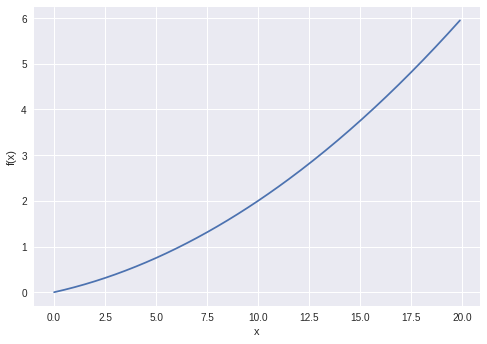

In [3]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [4]:
g1 = numerical_diff(function_1, 5)
g2 = numerical_diff(function_1, 10)
print(g1,g2)

d1 = numerical_diff_nu(function_1, 5)
d2 = numerical_diff_nu(function_1, 10)
print(d1,d2)


0.1999999999990898 0.2999999999986347
0.0 0.0
